# Basic image manipulation in Python: NumPy and Scipy

Image can be understood as a 2D numerical array. Or 3D such as RGB, or MRI, etc. From now on, we will understand **image==np.array**

We will be using basically `numpy` for basic array manipulation and `scipy` with its `ndimage` submodule dedicated for image processing of n-dimensional images.


## Common tasks in image processing

* Input/Output, displaying images
* Basic manipulations: cropping, flipping, rotating, …
* Image filtering: denoising, sharpening
* Image segmentation: labeling pixels corresponding to different objects
* Classification
* Feature extraction
* Registration
* …

In [200]:
%matplotlib inline

## Opening and writing to image files

In [201]:
!pip install imageio

In [ ]:
#import image chuck.png and show
import imageio
from scipy import misc
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

chuck = imageio.v2.imread('chuck.JPG')
chuck_clean = chuck.copy()
#show the image
plt.imshow(chuck)

In [203]:
imageio.show_formats()

TIFF - TIFF format [.tif .tiff .stk .lsm]
BMP-PIL - Windows Bitmap via Pillow [.bmp]
BUFR-PIL - BUFR via Pillow [.bufr]
CUR-PIL - Windows Cursor via Pillow [.cur]
DCX-PIL - Intel DCX via Pillow [.dcx]
DDS-PIL - DirectDraw Surface via Pillow [.dds]
DIB-PIL - Windows Bitmap via Pillow []
EPS-PIL - Encapsulated Postscript via Pillow [.ps .eps]
FITS-PIL - FITS via Pillow [.fit .fits]
FLI-PIL - Autodesk FLI/FLC Animation via Pillow [.fli .flc]
FPX-PIL - FlashPix via Pillow [.fpx]
FTEX-PIL - Texture File Format (IW2:EOC) via Pillow [.ftc .ftu]
GBR-PIL - GIMP brush file via Pillow [.gbr]
GIF-PIL - Compuserve GIF via Pillow [.gif]
GRIB-PIL - GRIB via Pillow [.grib]
HDF5-PIL - HDF5 via Pillow [.h5 .hdf]
ICNS-PIL - Mac OS icns resource via Pillow [.icns]
ICO-PIL - Windows Icon via Pillow [.ico]
IM-PIL - IFUNC Image Memory via Pillow [.im]
IMT-PIL - IM Tools via Pillow []
IPTC-PIL - IPTC/NAA via Pillow [.iim]
JPEG-PIL - JPEG (ISO 10918) via Pillow [.jfif .jpe .jpg .jpeg]
JPEG2000-PIL - JPEG 2000 

### Go from image to numpy array

/var/folders/gc/pq01pgrs2gjf3zqjxcb9p1j80000gn/T/ipykernel_9222/1764403506.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  chuck = imageio.imread('chuck.jpg')


imageio.core.util.Array


 (1334, 750, 3) uint8


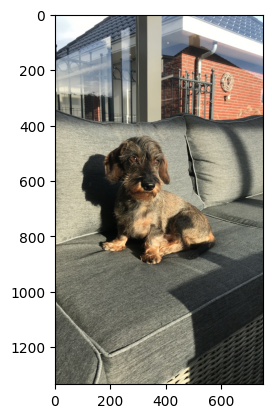

In [204]:
chuck = imageio.imread('chuck.jpg')
type(chuck)

print("\n", chuck.shape, chuck.dtype)
plt.imshow(chuck)
plt.show()


In [205]:
chuck

Array([[[241, 252, 254],
        [241, 252, 254],
        [241, 252, 254],
        ...,
        [226, 252, 253],
        [226, 252, 253],
        [226, 252, 253]],

       [[241, 252, 254],
        [240, 251, 253],
        [240, 251, 253],
        ...,
        [226, 252, 253],
        [226, 252, 253],
        [226, 252, 253]],

       [[240, 251, 253],
        [240, 251, 253],
        [240, 251, 253],
        ...,
        [226, 252, 253],
        [226, 252, 253],
        [226, 252, 253]],

       ...,

       [[ 80,  81,  73],
        [ 84,  85,  77],
        [ 86,  88,  77],
        ...,
        [ 32,  34,  29],
        [ 25,  27,  22],
        [ 21,  23,  18]],

       [[ 82,  83,  75],
        [ 88,  89,  81],
        [ 97,  99,  88],
        ...,
        [ 23,  25,  20],
        [ 23,  25,  20],
        [ 24,  26,  21]],

       [[ 90,  91,  83],
        [ 91,  92,  84],
        [102, 104,  93],
        ...,
        [ 18,  20,  15],
        [ 22,  24,  19],
        [ 23,  25,  20]]

In [206]:
def rgb_splitter(image):
    rgb_list = ['Reds','Greens','Blues']
    fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey = True)
    for i in range(3):
        ax[i].imshow(image[:,:,i], cmap = rgb_list[i])
        ax[i].set_title(rgb_list[i], fontsize = 15)

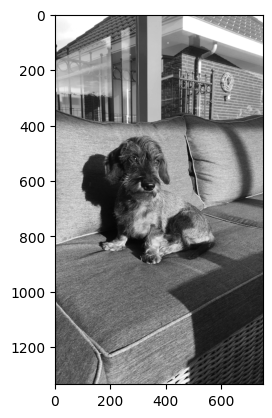

In [207]:
plt.imshow(chuck[:,:,1], cmap=plt.cm.gray)

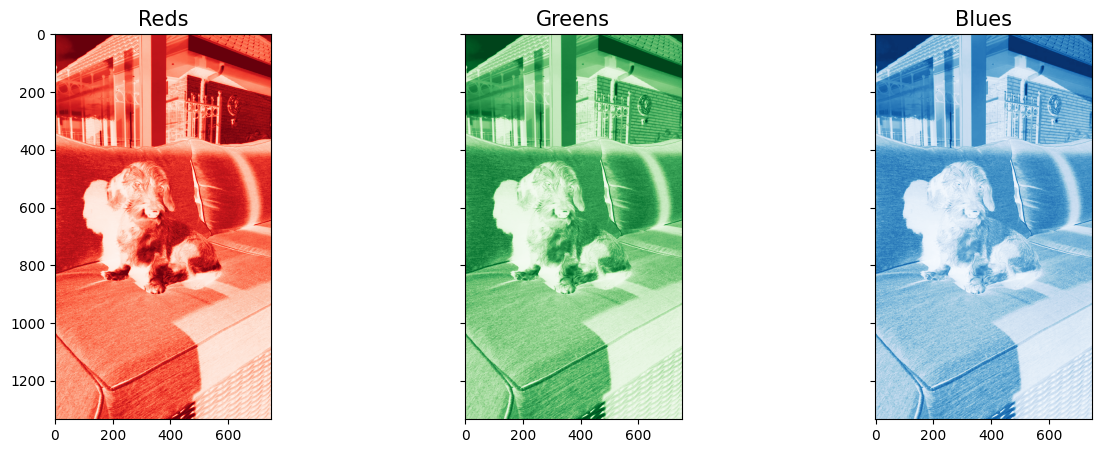

In [208]:
rgb_splitter(chuck)

In [209]:
chuck_c = chuck.copy()

In [210]:
chuck_c[:,:,1] = 150

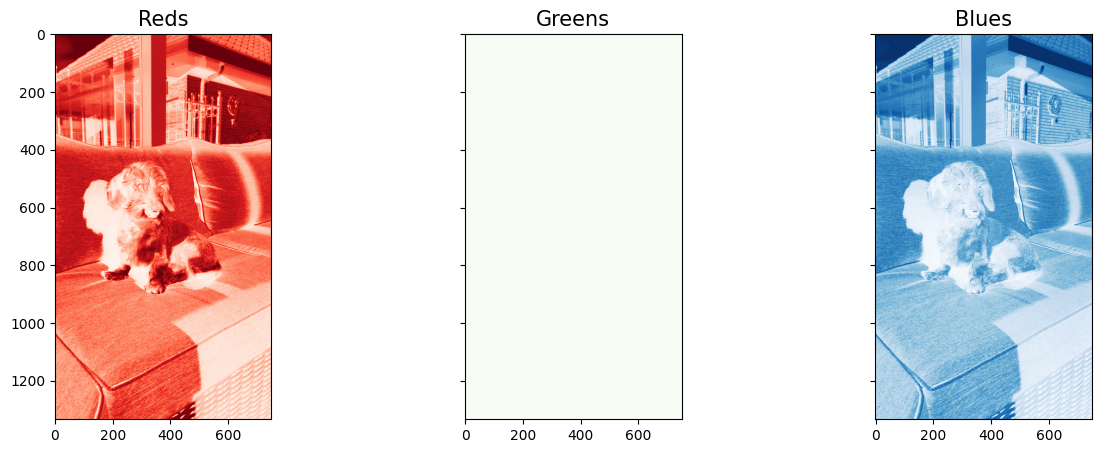

In [211]:
rgb_splitter(chuck_c)

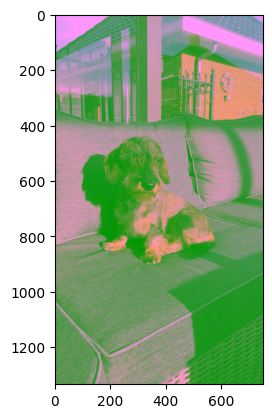

In [212]:
plt.imshow(chuck_c)

### Slicing the image

In [213]:
chuck2 = chuck[400:900, 150:600]

In [214]:
print("\n", chuck2.shape, chuck2.dtype)


 (500, 450, 3) uint8


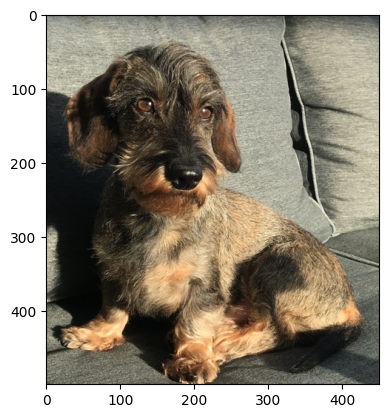

In [215]:
plt.imshow(chuck2)
plt.show()

## Displaying images
We can pass the image as gray, so that we use it for basic image processing

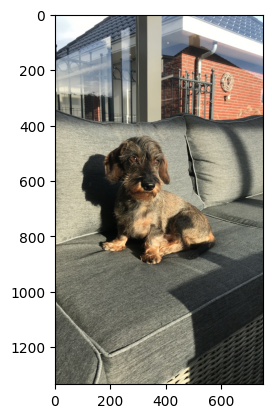

In [216]:
plt.imshow(chuck, cmap=plt.cm.gray)

In [217]:
chuck.shape

(1334, 750, 3)

We can alter the data by clipping it. Either using plt.imshow() or np.clip(). This will alter the contrast for us.

Array([[256.15, 256.15, 256.15, ..., 251.09, 251.09, 251.09],
       [256.15, 255.12, 255.12, ..., 251.09, 251.09, 251.09],
       [255.12, 255.12, 255.12, ..., 251.09, 251.09, 251.09],
       ...,
       [ 82.22,  86.34,  88.77, ...,  33.81,  26.6 ,  22.48],
       [ 84.28,  90.46, 100.1 , ...,  24.54,  24.54,  25.57],
       [ 92.52,  93.55, 105.25, ...,  19.39,  23.51,  24.54]])

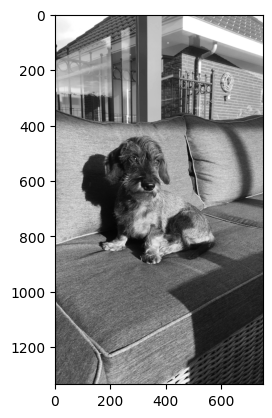

In [218]:
def convert_to_gray(image):
    red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]
    gray = 0.33 * red + 0.59 * green + 0.11 * blue
    return gray

convert_to_gray(chuck)
plt.imshow(convert_to_gray(chuck), cmap=plt.cm.gray)


In [219]:
def convert_to_gray_vect(image):
    # Y = red * 0.3 + green * 0.59 + blue * 0.11
    return np.dot(image[...,:3], [0.3, 0.59, 0.11])


In [220]:
chuck_grey = convert_to_gray_vect(chuck)

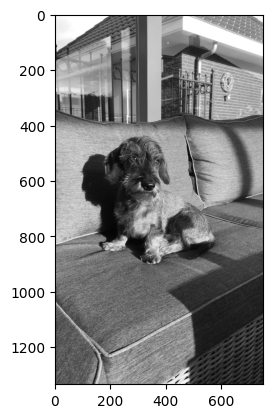

In [221]:
plt.imshow(chuck_grey, cmap=plt.cm.gray)

In [222]:
chuck_grey

Array([[248.92, 248.92, 248.92, ..., 244.31, 244.31, 244.31],
       [248.92, 247.92, 247.92, ..., 244.31, 244.31, 244.31],
       [247.92, 247.92, 247.92, ..., 244.31, 244.31, 244.31],
       ...,
       [ 79.82,  83.82,  86.19, ...,  32.85,  25.85,  21.85],
       [ 81.82,  87.82,  97.19, ...,  23.85,  23.85,  24.85],
       [ 89.82,  90.82, 102.19, ...,  18.85,  22.85,  23.85]])

In [223]:
chuck_grey2 = convert_to_gray(chuck)
chuck_grey2

Array([[256.15, 256.15, 256.15, ..., 251.09, 251.09, 251.09],
       [256.15, 255.12, 255.12, ..., 251.09, 251.09, 251.09],
       [255.12, 255.12, 255.12, ..., 251.09, 251.09, 251.09],
       ...,
       [ 82.22,  86.34,  88.77, ...,  33.81,  26.6 ,  22.48],
       [ 84.28,  90.46, 100.1 , ...,  24.54,  24.54,  25.57],
       [ 92.52,  93.55, 105.25, ...,  19.39,  23.51,  24.54]])

In [224]:
np.zeros([chuck.shape[0],chuck.shape[1]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<Figure size 1500x1500 with 0 Axes>

<Axes: >

(-0.5, 749.5, 1333.5, -0.5)

<Axes: >

(-0.5, 749.5, 1333.5, -0.5)

<Axes: >

(-0.5, 749.5, 1333.5, -0.5)

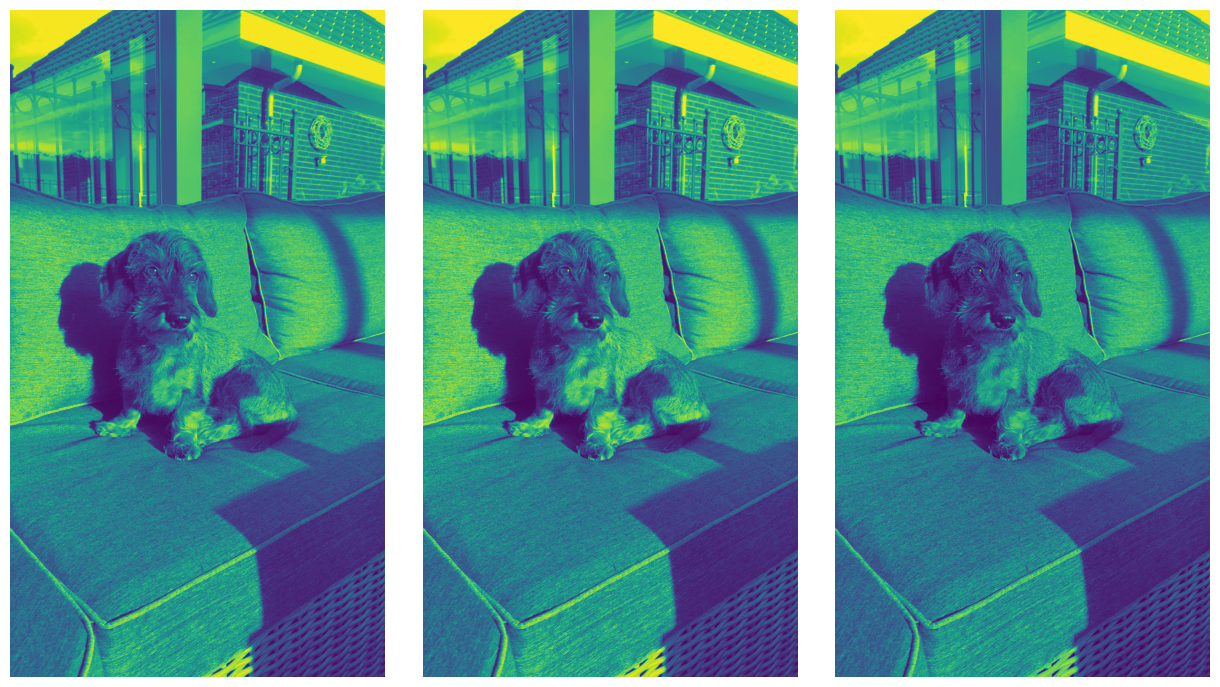

In [273]:
# manipulate all colors individually. Y =  red * 0.33 + green * 0.59 + blue * 0.11
chuck = chuck_clean

red = chuck[:,:,0] * -0.1
green = chuck[:,:,1] * 0.9
blue = chuck[:,:,2] * 0.1

red2 = chuck[:,:,0] * 0.1
green2 = chuck[:,:,1] * 0.9
blue2 = chuck[:,:,2] * 0.1

red3 = chuck[:,:,0] * 0.1
green3 = chuck[:,:,1] * 0.1
blue3 = chuck[:,:,2] * 0.9

Y = red + green + blue
Y2 = red2 + green2 + blue2
Y3 = red3 + green3 + blue3

plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(Y)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(Y2)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(Y3)
plt.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1, top=0.9, bottom=0.1, left=0.1, right=0.9)
plt.show()

### Contrast

(-0.5, 749.5, 1333.5, -0.5)

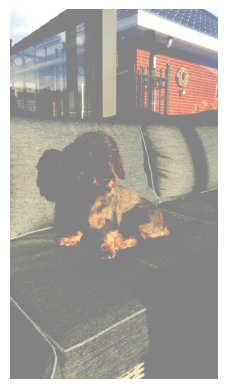

In [279]:
f_contrast = np.clip(chuck, 130, 410)

plt.imshow(f_contrast, cmap=plt.cm.gray)        

# Remove axes and ticks
plt.axis('off')

In [229]:
f_contrast.max()

230

In [230]:
f_contrast

Array([[[230, 230, 230],
        [230, 230, 230],
        [230, 230, 230],
        ...,
        [226, 230, 230],
        [226, 230, 230],
        [226, 230, 230]],

       [[230, 230, 230],
        [230, 230, 230],
        [230, 230, 230],
        ...,
        [226, 230, 230],
        [226, 230, 230],
        [226, 230, 230]],

       [[230, 230, 230],
        [230, 230, 230],
        [230, 230, 230],
        ...,
        [226, 230, 230],
        [226, 230, 230],
        [226, 230, 230]],

       ...,

       [[220, 220, 220],
        [220, 220, 220],
        [220, 220, 220],
        ...,
        [220, 220, 220],
        [220, 220, 220],
        [220, 220, 220]],

       [[220, 220, 220],
        [220, 220, 220],
        [220, 220, 220],
        ...,
        [220, 220, 220],
        [220, 220, 220],
        [220, 220, 220]],

       [[220, 220, 220],
        [220, 220, 220],
        [220, 220, 220],
        ...,
        [220, 220, 220],
        [220, 220, 220],
        [220, 220, 220]]

(-0.5, 749.5, 1333.5, -0.5)

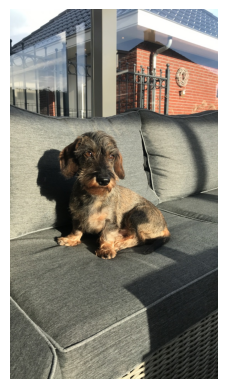

In [231]:
plt.imshow(chuck, cmap=plt.cm.gray, vmin=30, vmax=200)

# Remove axes and ticks
plt.axis('off')

## Basic manipulations
Since we are working with arrays, we can perform basic slicing array operation manipulations over the image

In [232]:
# Retrieve a pixel value
chuck = chuck_clean
chuck[0, 40]

Array([253, 255, 254], dtype=uint8)

<Figure size 600x600 with 0 Axes>

(-0.5, 449.5, 499.5, -0.5)

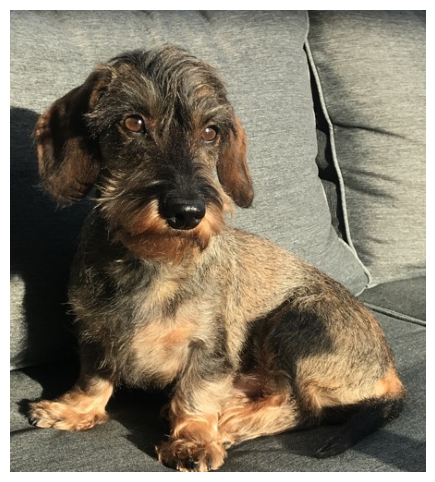

In [233]:
# Slice an image
plt.figure(figsize=(6, 6))
plt.imshow(chuck[400:900, 150:600], cmap=plt.cm.gray)
plt.axis('off')

plt.show()

In [234]:
chuck[100:120]

Array([[[219, 229, 239],
        [219, 229, 239],
        [219, 229, 239],
        ...,
        [140, 159, 176],
        [142, 163, 182],
        [144, 165, 184]],

       [[218, 228, 238],
        [218, 228, 238],
        [218, 228, 238],
        ...,
        [148, 167, 184],
        [142, 161, 178],
        [139, 160, 177]],

       [[218, 228, 238],
        [218, 228, 238],
        [217, 227, 237],
        ...,
        [164, 180, 196],
        [159, 176, 192],
        [144, 163, 178]],

       ...,

       [[ 35,  45,  55],
        [ 34,  44,  54],
        [ 30,  40,  50],
        ...,
        [254, 254, 252],
        [254, 254, 252],
        [254, 254, 252]],

       [[ 36,  46,  56],
        [ 38,  48,  58],
        [ 36,  46,  56],
        ...,
        [254, 254, 252],
        [254, 254, 252],
        [254, 254, 252]],

       [[ 35,  45,  55],
        [ 36,  46,  56],
        [ 37,  47,  57],
        ...,
        [254, 254, 252],
        [254, 254, 252],
        [254, 254, 252]]

<Figure size 600x600 with 0 Axes>

(-0.5, 749.5, 1333.5, -0.5)

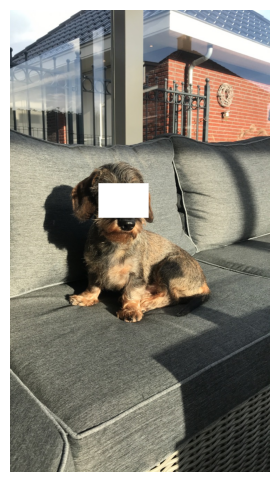

In [240]:
# Apply a mask
fm = chuck.copy()
fm[500:600,255:400] = 255

plt.figure(figsize=(6, 6))
plt.imshow(fm, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

## Statistical information

We can as well retrieve statistical information from the image

In [242]:
chuck = chuck_clean

print("Mean ", chuck.mean(), "| Max ", chuck.max(), "| Min ", chuck.min())


Mean  116.31617191404298 | Max  255 | Min  0


## Geometrical transformation

We can as well transform the images, which is extremely important for data augmentation for instance.

### Cropping

<Figure size 600x600 with 0 Axes>

(-0.5, 374.5, 666.5, -0.5)

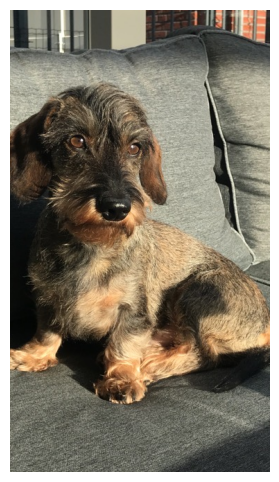

In [243]:
chuck = chuck_clean

lx, ly = chuck.shape[0], chuck.shape[1]

# Cropping (using floor division, dumping decimals after operation)
crop_chuck = chuck[lx//4:-lx//4, ly//4:-ly//4]

plt.figure(figsize=(6, 6))
plt.imshow(crop_chuck, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

In [244]:
crop_chuck.shape

(667, 375, 3)

## Flipping

<Figure size 600x600 with 0 Axes>

(-0.5, 749.5, 1333.5, -0.5)

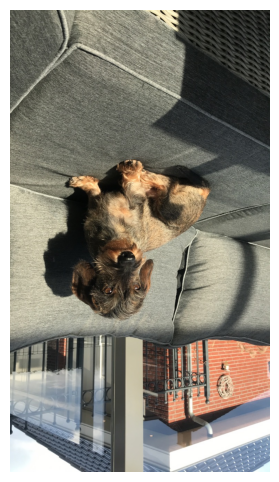

In [245]:
chuck = chuck_clean

# Up-down flip
flip_ud_chuck = np.flipud(chuck)

plt.figure(figsize=(6, 6))
plt.imshow(flip_ud_chuck, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

<Figure size 600x600 with 0 Axes>

(-0.5, 749.5, 1333.5, -0.5)

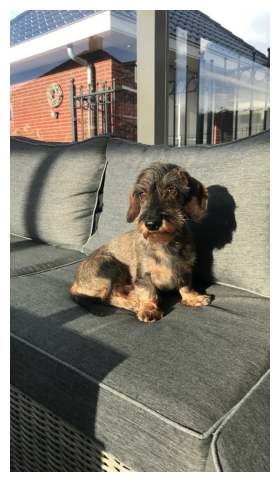

In [246]:
chuck = chuck_clean

# Left right flip
flip_ud_chuck = np.flip(chuck, axis=1)

plt.figure(figsize=(6, 6))
plt.imshow(flip_ud_chuck, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

### Rotation


<Figure size 600x600 with 0 Axes>

(-0.5, 1473.5, 1473.5, -0.5)

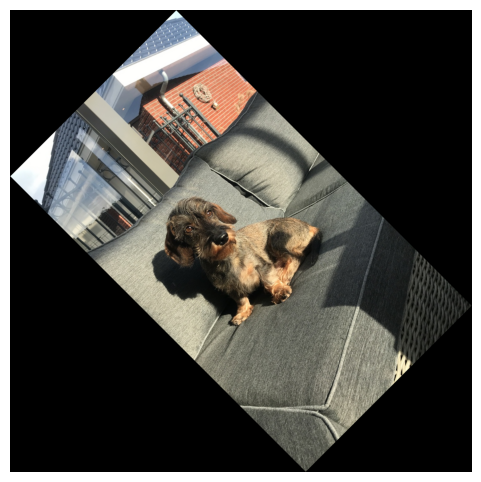

In [251]:
chuck = chuck_clean

# Rotation
rotate_chuck = ndimage.rotate(chuck, 45)

plt.figure(figsize=(6, 6))
plt.imshow(rotate_chuck, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

<Figure size 600x600 with 0 Axes>

(-0.5, 749.5, 1333.5, -0.5)

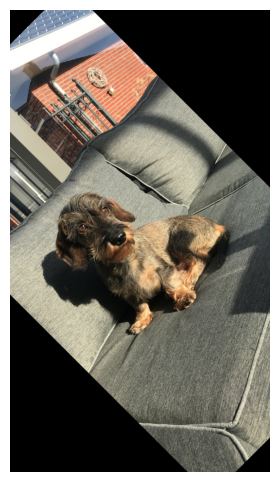

In [252]:
chuck = chuck_clean

# Rotation
rotate_chuck = ndimage.rotate(chuck, 45, reshape=False)

plt.figure(figsize=(6, 6))
plt.imshow(rotate_chuck, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

## Image filtering

### Blurring/smoothing

<Figure size 600x600 with 0 Axes>

(-0.5, 749.5, 1333.5, -0.5)

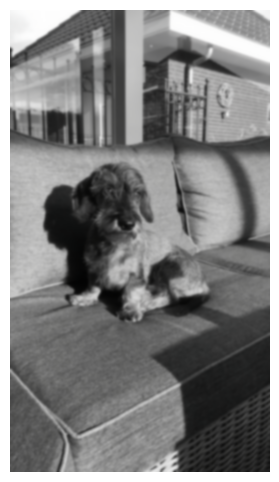

In [253]:
chuck = chuck_clean
blurred_chuck = ndimage.gaussian_filter(chuck, sigma=3)

plt.figure(figsize=(6, 6))
plt.imshow(blurred_chuck, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

<Figure size 600x600 with 0 Axes>

(-0.5, 749.5, 1333.5, -0.5)

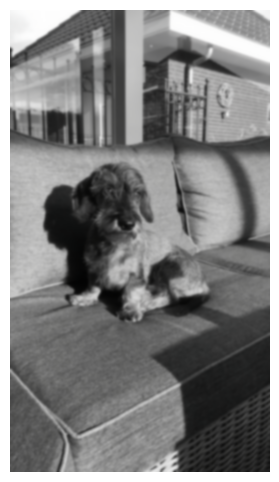

In [254]:
chuck = chuck
local_mean = ndimage.uniform_filter(chuck, size=11)

plt.figure(figsize=(6, 6))
plt.imshow(blurred_chuck, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

### Sharpening



<Figure size 600x600 with 0 Axes>

(-0.5, 749.5, 1333.5, -0.5)

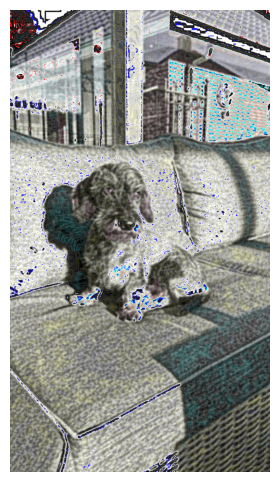

In [256]:
f = chuck_clean

# First we blur the image using a gaussian filter
blurred_f = ndimage.gaussian_filter(f, 3)

# Then we create another filter of the blurred image using sigma 1
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)

# We use an approximation of the Laplacian for increasing the weights of edges
alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(6, 6))
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

<Figure size 600x600 with 0 Axes>

(-0.5, 749.5, 1333.5, -0.5)

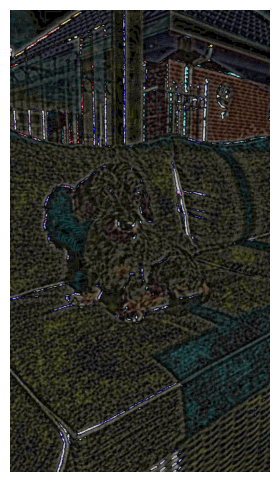

In [257]:
f = chuck_clean

# First we blur the image using a gaussian filter
blurred_f = ndimage.gaussian_filter(f, 3)

# Then we create another filter of the blurred image using sigma 1
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)

# We use an approximation of the Laplacian for increasing the weights of edges
alpha = 30
edges_weights = alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(6, 6))
plt.imshow(edges_weights, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

### Denoising

<Figure size 1200x280 with 0 Axes>

<Axes: >

(-0.5, 299.5, 259.5, -0.5)

Text(0.5, 1.0, 'noisy')

<Axes: >

(-0.5, 299.5, 259.5, -0.5)

Text(0.5, 1.0, 'Gaussian filter')

<Axes: >

(-0.5, 299.5, 259.5, -0.5)

Text(0.5, 1.0, 'Median filter')

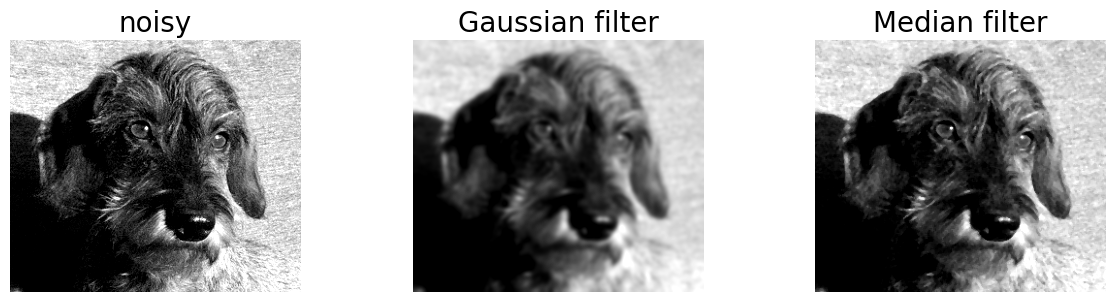

In [265]:
f = chuck_clean
f = convert_to_gray(f)
f = f[430:690, 150:450]

# Create a noisy image
noisy = f + 0.4*f.std()*np.random.random(f.shape)

# Reduce the noise using a gaussian
gauss_denoised = ndimage.gaussian_filter(noisy, 2)

# Reduce the noise using a median filter
med_denoised = ndimage.median_filter(noisy, 3)


plt.figure(figsize=(12,2.8))

plt.subplot(131)
plt.imshow(noisy, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('noisy', fontsize=20)
plt.subplot(132)
plt.imshow(gauss_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Gaussian filter', fontsize=20)
plt.subplot(133)
plt.imshow(med_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Median filter', fontsize=20)

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)
plt.show()

## Feature extraction

### Edge detection: sobel filter

<Figure size 1600x500 with 0 Axes>

<Axes: >

(-0.5, 313.5, 313.5, -0.5)

Text(0.5, 1.0, 'square')

<Axes: >

(-0.5, 313.5, 313.5, -0.5)

Text(0.5, 1.0, 'Sobel (x direction)')

<Axes: >

(-0.5, 313.5, 313.5, -0.5)

Text(0.5, 1.0, 'Sobel (y direction)')

<Axes: >

(-0.5, 313.5, 313.5, -0.5)

Text(0.5, 1.0, 'Sobel filter')

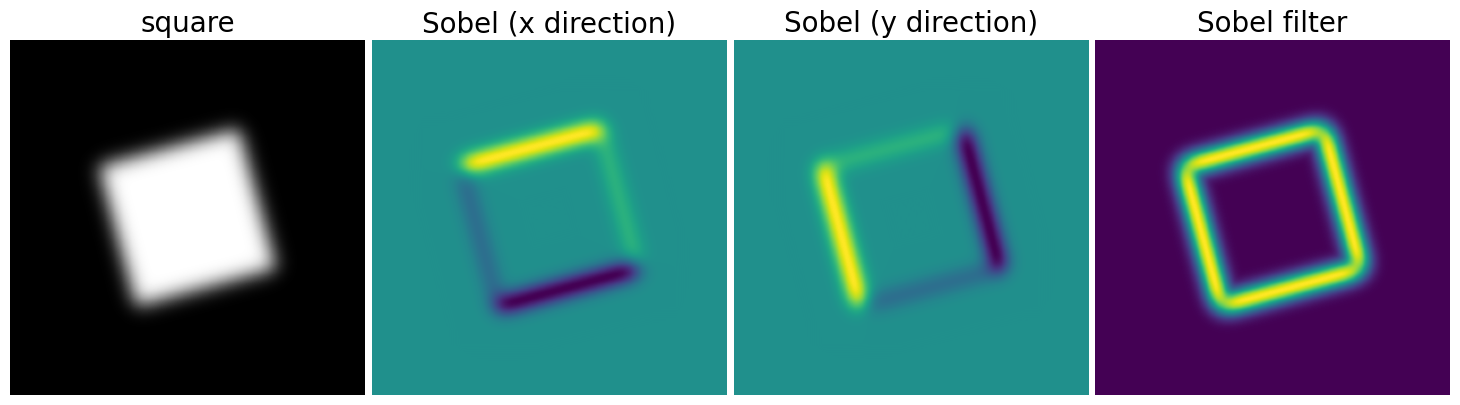

In [266]:
im = np.zeros((256, 256))
im[64:-64, 64:-64] = 1

im = ndimage.rotate(im, 15, mode='constant')
im = ndimage.gaussian_filter(im, 8)

sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sy)
plt.axis('off')
plt.title('Sobel (y direction)', fontsize=20)
plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()